In [1]:
import matplotlib.pyplot as plt
import numpy as np

"""
Initialize the inputs, weights from randomly selected uniformly distributed values
"""

w0 = np.random.uniform(low = -0.25, high = 0.25)
w1 = np.random.uniform(low = -1, high = 1)
w2 = np.random.uniform(low = -1, high = 1)
standard_weights = np.array([w0,w1,w2])

S = np.array([])
S0 = []
S1 = []

def create_classification_array(n):
    global S
    S = np.random.uniform(low = -1, high = 1, size=(n,2))
    for i in S:
        if ((1*w0)+(i[0]*w1)+(i[1]*w2)) >= 0:
            S1.append([i[0], i[1]])
        else:
            S0.append([i[0], i[1]])
            
def plot_boundary_graph():
    """
    Plot the initial graph from the randomly seleted inputs
    """
    S0_X = []
    S0_Y = []
    S1_X = []
    S1_Y = []
    for i in S0:
        S0_X += [i[0]]
        S0_Y += [i[1]]
    for i in S1:
        S1_X += [i[0]]
        S1_Y += [i[1]]
    
    
    plt.plot([(w2-w0)/w1 , -(w2+w0)/w1],[-1,1], color="blue", linewidth=1, label='Boundary')
    plt.scatter(x=S0_X, y=S0_Y, c='r', marker='s', label='S0')
    plt.scatter(x=S1_X, y=S1_Y, c='g', marker='o', label='S1')    
    
    plt.legend(loc="best", bbox_to_anchor=(1, 1))
    plt.xlim([-1, 1])
    plt.xlabel("x1")
    plt.ylim([-1, 1])
    plt.ylabel("x2")
    plt.show()

In [2]:
"""
Initialise the W'
"""
w0_1 = np.random.uniform(low = -1, high = 1)
w1_1 = np.random.uniform(low = -1, high = 1)
w2_1 = np.random.uniform(low = -1, high = 1)
initial_weights = [w0_1, w1_1, w2_1]

def activation_function(x):
    """
    Activation function (Step function)
    """
    return 1 if x >=0 else 0

def multiply_weights(weight, x_y):
    """
    Calculate output of neuron and use activation function to compute activated value of the neuron
    """
    return activation_function(weight[0]*1 + weight[1]*x_y[0] + weight[2]*x_y[1])


def get_misclassifications(S0, S1, current_epoch_weights):
    """
    Compute Misclassifications
    """
    misses = 0
    for i in range(len(S0)):
        y = multiply_weights(current_epoch_weights, S0[i][:])
        if y!=0:
            misses+=1
    for i in range(len(S1)):
        y = multiply_weights(current_epoch_weights, S1[i][:])
        if y!=1:
            misses+=1
    return misses

In [3]:
def perceptron_training_algorithm(current_weights, desired_weights, learning_rate):
    """
    Perceptron Training Algorithm
    """
    weights_deep_copy = current_weights[:]
    epoch_number = 0 
    weights_list = []
    misses = []
    while get_misclassifications(S0, S1, weights_deep_copy):
        misses.append(get_misclassifications(S0, S1, weights_deep_copy))
        epoch_number +=1
        for j in range(S.shape[0]):
            calculated_y = multiply_weights(weights_deep_copy, S[j])
            desired_y = multiply_weights(desired_weights, S[j])
            if calculated_y == 1 and desired_y == 0:
                weights_deep_copy[0] = weights_deep_copy[0] - learning_rate*1
                weights_deep_copy[1] = weights_deep_copy[1] - learning_rate*S[j][0]
                weights_deep_copy[2] = weights_deep_copy[2] - learning_rate*S[j][1]
            elif calculated_y == 0 and desired_y == 1 :
                weights_deep_copy[0] = weights_deep_copy[0] + learning_rate*1
                weights_deep_copy[1] = weights_deep_copy[1] + learning_rate*S[j][0]
                weights_deep_copy[2] = weights_deep_copy[2] + learning_rate*S[j][1]
        weights_list.append(weights_deep_copy)
    final_missclassification = get_misclassifications(S0, S1, weights_deep_copy)
    misses.append(final_missclassification)
    return misses, weights_list, epoch_number


def run_program(n):
    """
    Call the Perceptron training Algorithm 
    Plot Misclassifications Vs Epoch Graph for learning_rate 1, 10, 0.1
    """
    
    print(f"The standard weights w0, w1, w2 chosen are {w0}, {w1} and {w2}")
    
    create_classification_array(n)
    plot_boundary_graph()
    
    print(f"Initial weights W0', W1', W2' are {w0_1}, {w1_1} and  {w2_1}\n")
    
    fig, (axis1, axis2, axis3) = plt.subplots(nrows=3, ncols=1, figsize=(8,10)) 
    
    learning_rate = 1
    
    for learning_rate, axis in zip([1,10,0.1],[axis1, axis2, axis3]):
        
        misclassification_array, weights_array, epoch_number = perceptron_training_algorithm(initial_weights, 
                                                                                             standard_weights,learning_rate)
        print(f"Running algorithm with learning rate of {learning_rate}")
        print(f"First epoch misclassifications: {misclassification_array[0]}")
        print(f"Number of epochs before convergence: {epoch_number}")
        print(f"Final weights after convergence: {weights_array[-1]}\n")
        plot_epoch_vs_misclassifications(misclassification_array,  learning_rate, axis, n)
    
    fig.tight_layout()



def plot_epoch_vs_misclassifications(misclassification_array, learning_rate, axis, n):
    """
    Plot Misclassifications vs Epoch
    """
    epochs = len(misclassification_array)
    axis.plot(range(epochs), misclassification_array)
    axis.set_title(f"Plot for neural network with Learning Rate {learning_rate} and Sample Size of {n}")
    axis.set(xlabel='Epochs', ylabel='Misclassifications')
    axis.plot()

The standard weights w0, w1, w2 chosen are -0.07205031944432655, 0.9165674817920926 and 0.8685267563607435


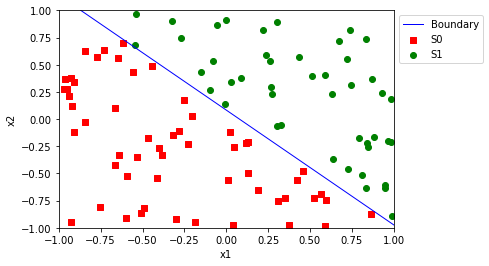

Initial weights W0', W1', W2' are 0.0752941041586046, 0.7649262423784156 and  0.7394574054408267

Running algorithm with learning rate of 1
First epoch misclassifications: 8
Number of epochs before convergence: 56
Final weights after convergence: [-0.9247058958413954, 8.728893580590652, 8.353537866868757]

Running algorithm with learning rate of 10
First epoch misclassifications: 8
Number of epochs before convergence: 74
Final weights after convergence: [-9.924705895841395, 99.54267081012075, 95.22150127900433]

Running algorithm with learning rate of 0.1
First epoch misclassifications: 8
Number of epochs before convergence: 44
Final weights after convergence: [-0.12470589584139541, 1.137457193790146, 1.114282921762185]



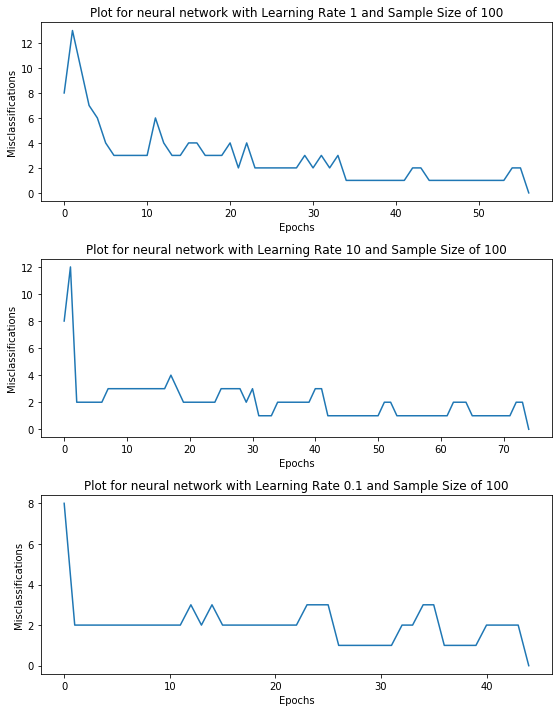

In [4]:
# Run the model for 100 sample inputs
run_program(100)

# Analysis for 100 size sample

## Final weights and optimal weights
### The final weights are very much different from the standard set of weights w0, w1 and w2 which were initially chosen to separate the sample. The converged weights obtained from the different learning rates for the same sample is even outside the intial set range of [-1,1].

## Learning rate comparison with 'epoch vs misclassification' plot
### Learning rates should not be very high as it may return unstabe results and a very low learning rate will take a very long time(epochs) to converge. Hence depending on the number of input parameters we can select an apt learning rate. Here all the learning rates give a comparable/similar ouput in terms of number of epochs before convergence. 

## Will the resuts change with change in initial weights r sample (size)?
### Changing the initial weights or the sample may change the learning steps/epochs for a particular learning rate. There will not be major changes of epoch with respect to the initial weights chosen being changed, but the sample size may prove to increase the epochs for a particular learning rate by a larger amount comparatively.


The standard weights w0, w1, w2 chosen are -0.07205031944432655, 0.9165674817920926 and 0.8685267563607435


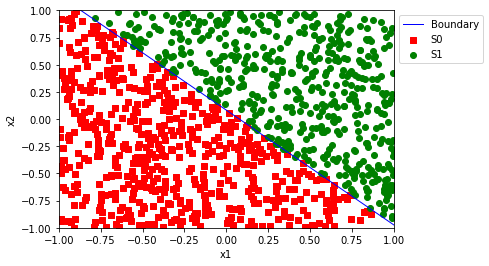

Initial weights W0', W1', W2' are 0.0752941041586046, 0.7649262423784156 and  0.7394574054408267

Running algorithm with learning rate of 1
First epoch misclassifications: 105
Number of epochs before convergence: 67
Final weights after convergence: [-1.9247058958413952, 24.01945519019683, 22.582232146316034]

Running algorithm with learning rate of 10
First epoch misclassifications: 105
Number of epochs before convergence: 70
Final weights after convergence: [-19.924705895841395, 249.50353547170556, 235.48804779292237]

Running algorithm with learning rate of 0.1
First epoch misclassifications: 105
Number of epochs before convergence: 20
Final weights after convergence: [-0.12470589584139541, 1.5587709494671713, 1.4719224568632772]



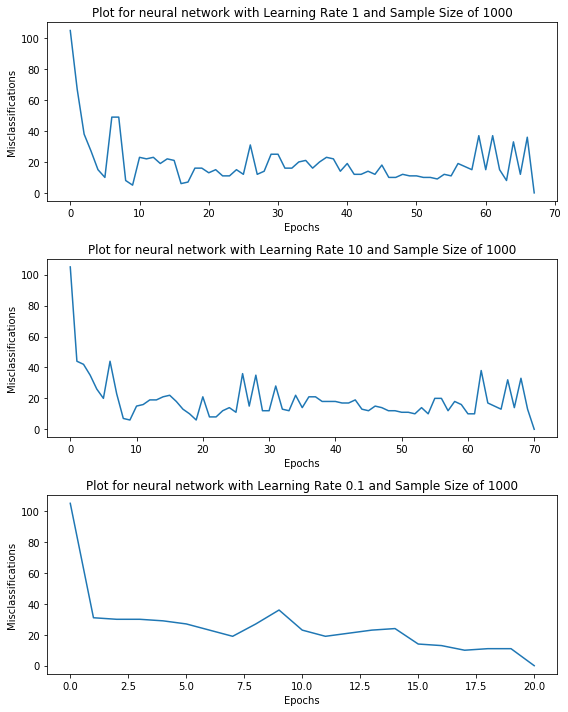

In [6]:
# Run the model for 1000 sample inputs
run_program(1000)

# Comparison between sample of 100 and 1000

### Naturally the epochs before convergence increases (Though it has not increased a lot here as the initial misclassification are less and the random intial weights are good). In this model we can see the epochs has either increased or stayed the same for learning rate of 1 and 10, but for learning rate of 0.1 it has decreased by a large amount (which was the case for many of the model runs)

### Keeping a lower learning rate (0.1) leads to a similar final weight for the two different sample (sizes).

### 